In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [ ]:
data = pd.read_csv('mhealth_full.csv')

In [ ]:
data_activity_0 = data[data['activity'] == 0]
data_activity_else = data[data['activity'] != 0]

data_activity_0 = data_activity_0.sample(n=30720, random_state=1)
data = pd.concat([data_activity_0, data_activity_else])

In [ ]:
X = data.drop(['activity', 'subject'], axis=1)
y = data['activity']

In [ ]:
X.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z'],
      dtype='object')

In [ ]:
y

978959      0
332102      0
153015      0
776193      0
641719      0
           ..
1213641    12
1213642    12
1213643    12
1213644    12
1213645    12
Name: activity, Length: 373915, dtype: int64

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    activity_map = {
        0: 'Null',
        1: 'Standing still',  
        2: 'Sitting and relaxing', 
        3: 'Lying down',  
        4: 'Walking',  
        5: 'Climbing stairs',  
        6: 'Waist bends forward',
        7: 'Frontal elevation of arms', 
        8: 'Knees bending (crouching)', 
        9: 'Cycling', 
        10: 'Jogging', 
        11: 'Running', 
        12: 'Jump front & back' 
    }
    plt.figure(figsize=(14, 12))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

In [ ]:
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]
X_seq, y_seq = split_sequences(full_set, 25)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_seq, y_seq, test_size=0.25, random_state=1)
y_train_new = to_categorical(y_train_new)

In [ ]:
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features), padding='same'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
  model.fit(X_train_new, y_train_new, epochs=10)

Epoch 1/10
8764/8764 [==============================] - 97s 9ms/step - loss: 0.1534 - accuracy: 0.9532
Epoch 2/10
8764/8764 [==============================] - 81s 9ms/step - loss: 0.0213 - accuracy: 0.9948
Epoch 3/10
8764/8764 [==============================] - 79s 9ms/step - loss: 0.0172 - accuracy: 0.9960
Epoch 4/10
8764/8764 [==============================] - 78s 9ms/step - loss: 0.0130 - accuracy: 0.9969
Epoch 5/10
8764/8764 [==============================] - 77s 9ms/step - loss: 0.0136 - accuracy: 0.9971
Epoch 6/10
8764/8764 [==============================] - 77s 9ms/step - loss: 0.0122 - accuracy: 0.9975
Epoch 7/10
8764/8764 [==============================] - 78s 9ms/step - loss: 0.0109 - accuracy: 0.9979
Epoch 8/10
8764/8764 [==============================] - 83s 9ms/step - loss: 0.0123 - accuracy: 0.9977
Epoch 9/10
8764/8764 [==============================] - 79s 9ms/step - loss: 0.0123 - accuracy: 0.9978
Epoch 10/10
8764/8764 [==============================] - 79s 9ms/step - l

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 64)            4096      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 64)            12352     
_________________________________________________________________
dropout (Dropout)            (None, 25, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               98432     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1

In [ ]:
y_pred = model.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)

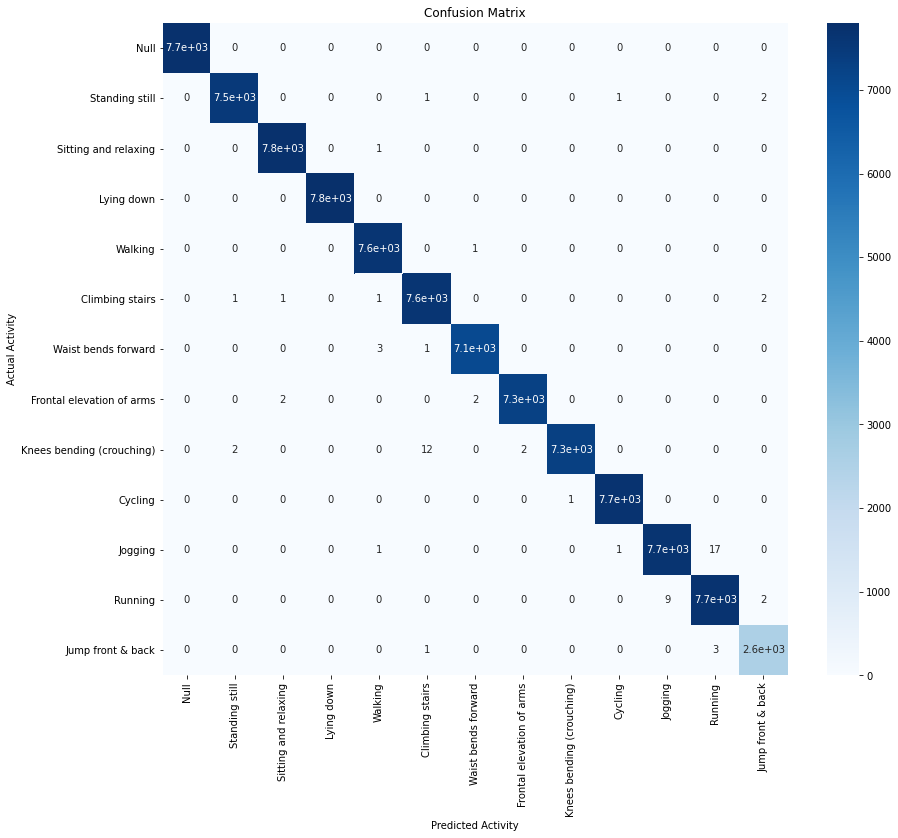

Accuracy Score: 99.9251%
Precision Score: 99.9175%
Recall Score: 99.9206%
F_1 Score: 99.9190%


In [ ]:
results_summarizer(y_test_new, y_pred)